Center: 8.3059,11.157095
1073943316
1074056959
524288
3221580750
2148007936
1074237036
2147914510
2148409412
961809
2148007936
892590
776635
2148409412
1074030697
759250
2147780567
1074435121
800514
1074089136
2147553199
606359
3221778835
1074008476
934644
[(-4.305899999999999, -0.3058999999999994, 4, 8), (-3.3058999999999994, -1.3058999999999994, 5, 7), (-3.3058999999999994, -2.3058999999999994, 5, 6), (-2.3058999999999994, -2.3058999999999994, 6, 6), (-3.3058999999999994, -3.3058999999999994, 5, 5), (-0.3058999999999994, -2.3058999999999994, 8, 6), (-0.3058999999999994, -2.3058999999999994, 8, 6), (1.6941000000000006, -3.3058999999999994, 10, 5), (3.6941000000000006, -3.3058999999999994, 12, 5), (0.6941000000000006, 0.6941000000000006, 9, 9), (2.6941000000000006, 3.6941000000000006, 11, 12), (3.6941000000000006, 9.6941, 12, 18), (2.6941000000000006, 7.694100000000001, 11, 16), (2.6941000000000006, 8.6941, 11, 17), (1.6941000000000006, 9.6941, 10, 18), (0.6941000000000006, 5.694100000

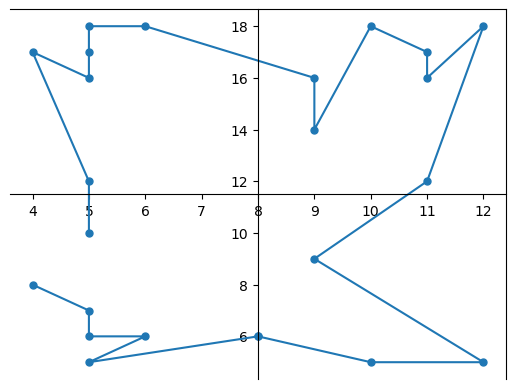

In [8]:
import random, copy, math
import matplotlib.pyplot as plt

# Playground for playing with ideas to sort points efficiently

points = [
    (4, 17),  (5, 12),  (5, 10),  (4, 8),
    (6, 6),   (8, 6),   (9, 9),   (9, 14),
    (11, 12), (11, 16), (6, 18),  (5, 18),
    (5, 17),  (5, 16),  (5, 5),   (5, 6),
    (5, 7),   (12, 5),  (10, 5),  (8, 6),
    (12, 18), (11, 17), (10, 18), (9, 16),
]

random.shuffle(points)

x = [x[0] for x in points]
y = [x[1] for x in points]

cx = ((max(x) + min(x)) + 0.6118) / 2.0
cy = ((max(y) + min(y)) + -0.68581) / 2.0

x_norm = [v - cx for v in x]
y_norm = [v - cx for v in y]

norm = [(x_norm[i], y_norm[i], points[i][0], points[i][1]) for i in range(0, len(x_norm))]

print(f"Center: {cx},{cy}")

norm2 = copy.deepcopy(norm)
norm3 = copy.deepcopy(norm)

# Idea 1: Just do what apriltag does with quadrants and dy/dx then sort points
def idea1(tup):
    quadrants = ((-1 * (2 << 15), 0), (2 * (2 << 15), 2 << 15))
    dx = tup[0]
    dy = tup[1] 
    
    quad = quadrants[dy >= 0][dx >= 0]
    if dy < 0:
        dy = -dy
        dx = -dx

    if dx < 0:
        tmp = dx
        dx = dy
        dy = -tmp

    return quad + dy / dx

norm.sort(key = lambda tup: idea1(tup))

# Idea 2: Just do what 971 does and take atan2 for angle and sort points
norm2.sort(key = lambda tup: math.atan2(tup[1], tup[0]))

# Idea 3: Taxicab angles
def idea3(tup):
    def inner(tup):
        quad1 = 1 << 30
        quad2 = 2 << 30
        quad3 = 3 << 30
        step = 1 << 20
        y = tup[1]
        x = tup[0]
        if y >= 0 and x >= 0:
            return (y/(x + y)) * step
        if y >= 0 and x < 0:
            return quad1+(-x/(-x+y)) * step
        if y < 0 and x < 0:
            return quad2+(-y/(-x-y)) * step
        if y < 0 and x >= 0:
            return quad3+(x/(x-y)) * step
        else:
            print("Invalid")

    ret = math.floor(inner(tup))
    print(ret)
    return ret

norm3.sort(key = lambda tup: idea3(tup))

print(norm)
print(norm2)
print(norm3)

xs = [x[2] for x in norm]
ys = [x[3] for x in norm]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


plt.plot(xs, ys, marker='o', markersize=5)
plt.show(block=True)


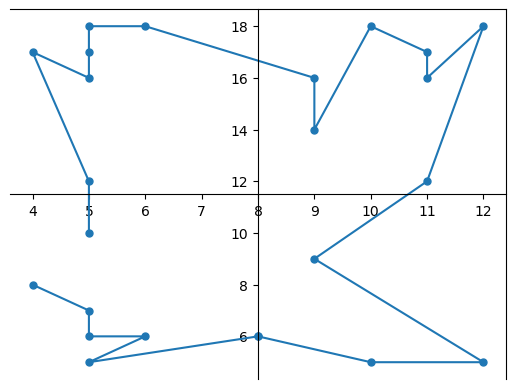

In [3]:
xs = [x[2] for x in norm2]
ys = [x[3] for x in norm2]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


plt.plot(xs, ys, marker='o', markersize=5)
plt.show(block=True)

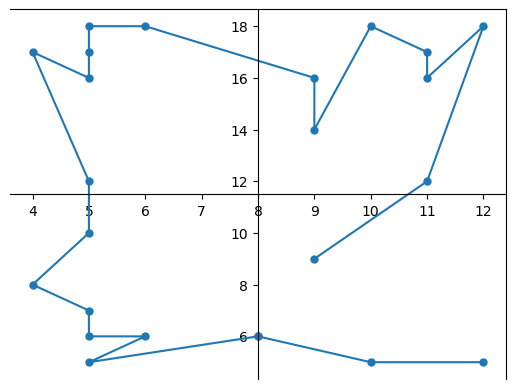

In [6]:
xs = [x[2] for x in norm3]
ys = [x[3] for x in norm3]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


plt.plot(xs, ys, marker='o', markersize=5)
plt.show(block=True)

In [7]:
# For an image of size 2047x2047 assuming the full width could be used here, what is the min and max result values, and are they valid?
# ~2044 - 2 as longest distance from center, should be okay

vmax = 2044 / 2.6118
vmin = -2.68581 / 2044
min2 = -2.68581 / 2043
step = 1 << 20
scaled_max = vmax * step
scaled_min = vmin * step
scaled_min2 = min2 * step

if scaled_max >= 1073741824:
    print("Scaled max too big")

if abs(math.floor(scaled_min) - math.floor(scaled_min2)) < 1:
    print("Scaled min too small")

print(f"Max: {vmax} scaled: {scaled_max}, Min: {vmin} scaled: {scaled_min} scaled2: {scaled_min2}")

print(1 << 30)

Max: 782.6020369094111 scaled: 820617713.4543227, Min: -0.0013139970645792563 scaled: -1377.8257859882583 scaled2: -1378.5001990014684
1073741824
